Kết quả đánh giá mô hình Desicion Tree:
Accuracy:  0.7158
F1-score:  0.7102
Precision: 0.7135
Recall:    0.7158
Thời gian huấn luyện: 2.7385 giây
Thời gian test:       0.0212 giây


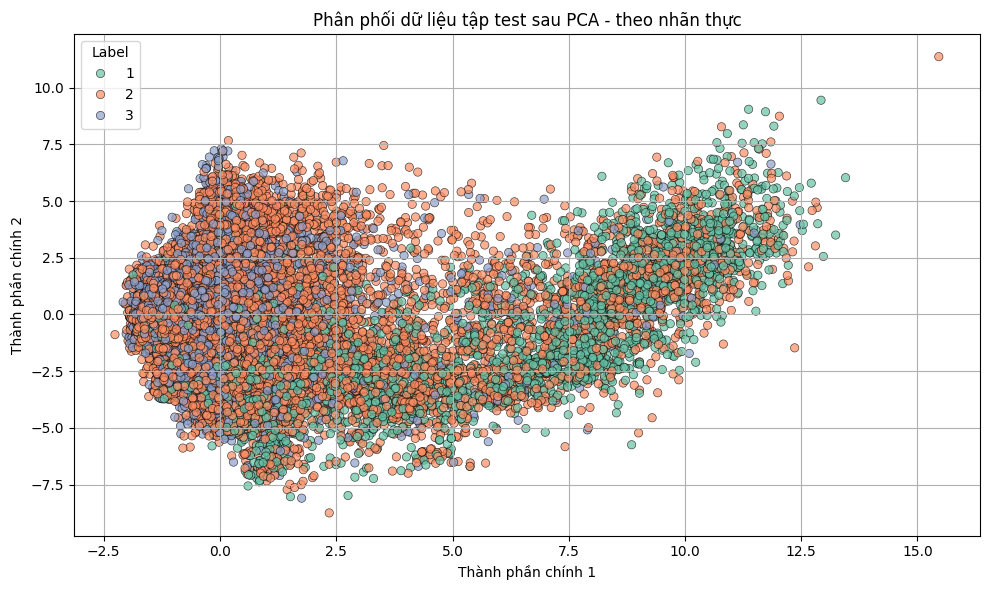

<Figure size 640x480 with 0 Axes>

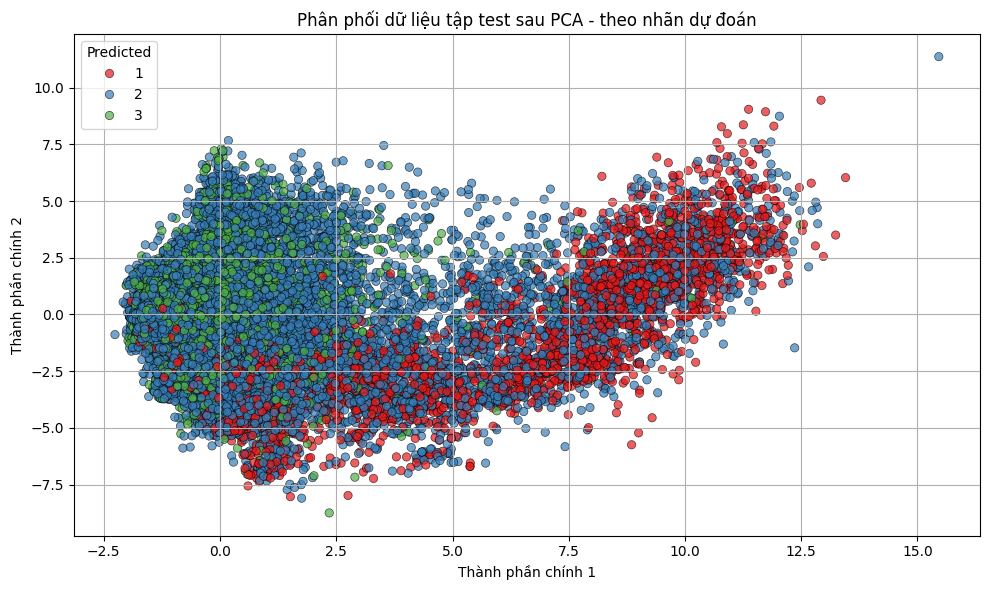

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import random
import statistics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Bước 1: Đọc dữ liệu
df = pd.read_csv('data.csv', sep=',')

# Bước 2: Loại bỏ cột ID nếu có
if 'building_id' in df.columns:
    df = df.drop(columns=['building_id'])

# Bước 3: Xác định X và y
X = df.drop(columns=['labels'])
y = df['labels']

# # Bước 4: One-hot encoding
# X = pd.get_dummies(X)

# Bước 5: Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 6: Huấn luyện Naive Bayes + đo thời gian huấn luyện
start_train = time.time()
model = DecisionTreeClassifier(random_state=1234, max_depth= 100, min_samples_leaf= 20)
model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Bước 7: Dự đoán + đo thời gian test
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

# Bước 8: Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # hoặc 'macro' nếu bạn muốn tính đều các lớp
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Bước 9: In kết quả
print("Kết quả đánh giá mô hình Desicion Tree:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Thời gian huấn luyện: {training_time:.4f} giây")
print(f"Thời gian test:       {testing_time:.4f} giây")

from sklearn.decomposition import PCA

# Giảm chiều dữ liệu để trực quan hóa (chỉ dùng cho trực quan, không dùng để huấn luyện)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Trực quan hóa nhãn thực tế
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='Set2', alpha=0.7, edgecolor='k')
plt.title("Phân phối dữ liệu tập test sau PCA - theo nhãn thực")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('actual_labels_pca.png')

# Trực quan hóa nhãn dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='Set1', alpha=0.7, edgecolor='k')
plt.title("Phân phối dữ liệu tập test sau PCA - theo nhãn dự đoán")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(title='Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('predicted_labels_pca.png')

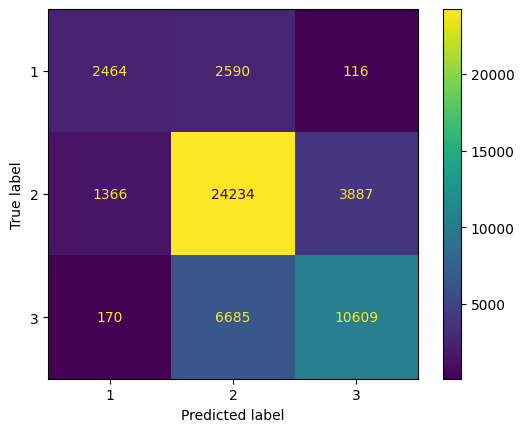

<Figure size 640x480 with 0 Axes>

In [ ]:
#Confusion Matrix
Y_DuDoan = model.predict(X_test)
label = [1,2,3]
cm = confusion_matrix(y_test, Y_DuDoan, labels=label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot()
plt.show()
plt.savefig('confusion_matrix.png')

In [ ]:
# ======= KIỂM TRA OVERFITTING =======
# 1. So sánh hiệu suất trên tập train và test
model_base = DecisionTreeClassifier(max_depth= 100, min_samples_leaf= 20,random_state=12345)
model_base.fit(X_train, Y_train)
print("=== KIỂM TRA OVERFITTING ===\n")
print("Với Decision Tree max_depth=100, min_sample_leaf=20\n")
# Dự đoán trên tập huấn luyện
y_train_pred = model_base.predict(X_train)

# Tính các chỉ số cho tập train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# So sánh kết quả
print("1. SO SÁNH HIỆU SUẤT TRAIN vs TEST:")
print(f"{'Metric':<12} {'Train':<10} {'Test':<10} {'Difference':<12}")
print("-" * 50)
print(f"{'Accuracy':<12} {train_accuracy:<10.4f} {accuracy:<10.4f} {abs(train_accuracy-accuracy):<12.4f}")
print(f"{'F1-score':<12} {train_f1:<10.4f} {f1:<10.4f} {abs(train_f1-f1):<12.4f}")
print(f"{'Precision':<12} {train_precision:<10.4f} {precision:<10.4f} {abs(train_precision-precision):<12.4f}")
print(f"{'Recall':<12} {train_recall:<10.4f} {recall:<10.4f} {abs(train_recall-recall):<12.4f}")

# Đánh giá overfitting
accuracy_diff = abs(train_accuracy - accuracy)
print(f"\n2. ĐÁNH GIÁ OVERFITTING:")
if accuracy_diff > 0.1:
    print(f"OVERFITTING NGHIÊM TRỌNG: Chênh lệch accuracy = {accuracy_diff:.4f} (>10%)")
elif accuracy_diff > 0.05:
    print(f"OVERFITTING VỪA PHẢI: Chênh lệch accuracy = {accuracy_diff:.4f} (5-10%)")
elif accuracy_diff > 0.02:
    print(f"OVERFITTING NHẸ: Chênh lệch accuracy = {accuracy_diff:.4f} (2-5%)")
else:
    print(f"KHÔNG OVERFITTING: Chênh lệch accuracy = {accuracy_diff:.4f} (<2%)")

In [ ]:
# Tính toán lỗi mô hình
train_errors = {}

for leap in leaps_list:
    train_errors[leap] = [1 - acc for acc in train_accuracies[leap]]

plt.figure(figsize=(12, 8))

for leap in leaps_list:
    plt.plot(depths_list, train_errors[leap], linestyle='-', label=f'Training Error (min_samples_leaf={leap})')

plt.xlabel('Max Depth of Tree')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Decision Tree Training Error vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

## Thử nghiệm các giá trị khác nhau cho `max depth` và `min samples leaf`
Phân tích biểu đồ test accuracy so với max depth cho các giá trị min_samples_leaf khác nhau để xác định sự kết hợp tối ưu giúp giảm overfitting.

In [ ]:
print("Phân tích accuracy của cây theo từng mức min_samples_leaf:")

# Analyze test accuracies to find optimal depth for each min_samples_leaf
optimal_combinations = {}
print("\nTùy chỉnh max_depth cho mỗi min_samples_leaf dựa trên test accuracy:")
for leap in leaps_list:
    accuracies = test_accuracies[leap]
    max_acc = max(accuracies)
    # Tìm tất cả depths đạt được max accuracy
    optimal_depths = [depths_list[i] for i, acc in enumerate(accuracies) if acc == max_acc]
    optimal_combinations[leap] = {'max_accuracy': max_acc, 'optimal_depths': optimal_depths}
    print(f"min_samples_leaf = {leap}: Max Test Accuracy = {max_acc:.4f} at max_depth(s) = {optimal_depths}")

# Tìm tốt nhất
best_leap = None
highest_overall_test_accuracy = -1
print("\nComparing min_samples_leaf values for overall test accuracy:")
for leap, data in optimal_combinations.items():
    print(f"min_samples_leaf = {leap}: Max Test Accuracy = {data['max_accuracy']:.4f}")
    if data['max_accuracy'] > highest_overall_test_accuracy:
        highest_overall_test_accuracy = data['max_accuracy']
        best_leap = leap

print(f"\nGiá trị min_samples_leaf có test accuracy cao nhất: {best_leap} với Max Test Accuracy = {highest_overall_test_accuracy:.4f}")

## Thử nghiệm với tham số `min samples split`
Thêm tham số `min_samples_split` vào quá trình thử nghiệm Decision Tree để đánh giá ảnh hưởng của nó đến hiệu suất và overfitting của mô hình.


In [ ]:
# Tập min_samples_splits kiểm thử
min_samples_splits = {20, 80, 100, 500, 1000, 2000}
min_samples_splits_list = sorted(list(min_samples_splits))

# Thử với min_samples_leaf = 10 và 20, và max_depth = 50 và 100 vì hứa hẹn kết quả tốt
selected_depths = {50, 100}
selected_leaps = {10, 20}

# Kết quả
results = []

print("Testing different combinations of max_depth, min_samples_leaf, and min_samples_split:")
for depth in selected_depths:
    for leap in selected_leaps:
        for split in min_samples_splits_list:
            print(f"\nTesting: max_depth={depth}, min_samples_leaf={leap}, min_samples_split={split}")

            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leap, min_samples_split=split, random_state=42)
            model.fit(X_train, y_train)

            train_accuracy = accuracy_score(y_train, model.predict(X_train))
            test_accuracy = accuracy_score(y_test, model.predict(X_test))

            results.append({
                'max_depth': depth,
                'min_samples_leaf': leap,
                'min_samples_split': split,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'accuracy_difference': abs(train_accuracy - test_accuracy)
            })

# Đánh giá results
print("\nAnalysis of Results:")
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='accuracy_difference'))

print("\nCombinations with smallest accuracy difference (least overfitting):")
display(results_df.sort_values(by='accuracy_difference').head())

print("\nCombinations with highest test accuracy:")
display(results_df.sort_values(by='test_accuracy', ascending=False).head())

promising_combinations = results_df[results_df['accuracy_difference'] < 0.05] # Lọc kết quả < 5%

if not promising_combinations.empty:
    print("\nPromising combinations (accuracy difference < 5%):")
    display(promising_combinations.sort_values(by='test_accuracy', ascending=False))
else:
    print("\nNo combinations found with accuracy difference less than 5%.")


In [ ]:
print("\n Tổng kết tìm kiếm:")

print("\n Kết hợp với mức độ chênh lệch accuracy nhỏ nhất (overfitting ít nhất):")
display(results_df.sort_values(by='accuracy_difference').head())

print("\n Kết hợp với test accuracy cao nhất:")
display(results_df.sort_values(by='test_accuracy', ascending=False).head())

print("\n Tìm thấy tập thuộc tính hứa hẹn (cân bằng giữa overfitting thấp và test accuracy cao):")

promising_combinations_filtered = results_df[results_df['min_samples_leaf'] == 20].sort_values(by='test_accuracy', ascending=False)

if not promising_combinations_filtered.empty:
    display(promising_combinations_filtered)
else:
    print("Không tìm thấy tập thuộc tính hứa hẹn")

print("\n Ảnh hưởng của min_samples_split:")

print("Với max_depth (50, 100) và min_samples_leaf (10, 20), tham số 'min_samples_split' (2, 5, 10, 20) tác động rất nhỏ đến kết quả của training và testing accuracy , vì vậy dẫn đến chênh lệch accuracy (overfitting).")
print("Nguyên nhân chính ảnh hưởng đến overfitting trong model Decision Tree là 'max_depth' và 'min_samples_leaf'.")


In [ ]:
#Dựa trên bộ thuộc tính đã thu được xây dựng model mới
optimal_max_depth = 50
optimal_min_samples_leaf = 10
optimal_min_samples_split = 2000 

print(f"Training Decision Tree model with optimal parameters:")
print(f"max_depth: {optimal_max_depth}")
print(f"min_samples_leaf: {optimal_min_samples_leaf}")
print(f"min_samples_split: {optimal_min_samples_split}\n")

model_optimal = DecisionTreeClassifier(
    max_depth=optimal_max_depth,
    min_samples_leaf=optimal_min_samples_leaf,
    min_samples_split=optimal_min_samples_split,
    random_state=12345
)

#Train model
model_optimal.fit(X_train, y_train)

print("Model trained successfully.")

In [ ]:
#Đánh giá lại mô hình
y_train_pred_optimal = model_optimal.predict(X_train)
y_test_pred_optimal = model_optimal.predict(X_test)

train_accuracy_optimal = accuracy_score(y_train, y_train_pred_optimal)
test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)

print("=== Đánh giá với bộ tham số tùy chỉnh ===\n")
print(f"Bộ tham số:")
print(f"max_depth: {optimal_max_depth}")
print(f"min_samples_leaf: {optimal_min_samples_leaf}")
print(f"min_samples_split: {optimal_min_samples_split}\n")

print("Training Set:")
print(f"Accuracy: {train_accuracy_optimal:.4f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_optimal:.4f}")

# So sánh
accuracy_diff_optimal = abs(train_accuracy_optimal - test_accuracy_optimal)
print(f"\nChênh lệch Accuracy: {accuracy_diff_optimal:.4f}")

# Xét mức Overfitting
print(f"\n Mức độ Overfitting:")
if accuracy_diff_optimal > 0.1:
    print(f"OVERFITTING NGHIÊM TRỌNG: Chênh lệch accuracy = {accuracy_diff_optimal:.4f} (>10%)")
elif accuracy_diff_optimal > 0.05:
    print(f"OVERFITTING VỪA PHẢI: Chênh lệch accuracy = {accuracy_diff_optimal:.4f} (5-10%)")
elif accuracy_diff_optimal > 0.02:
    print(f"OVERFITTING NHẸ: Chênh lệch accuracy = {accuracy_diff_optimal:.4f} (2-5%)")
else:
    print(f"KHÔNG OVERFITTING: Chênh lệch accuracy = {accuracy_diff_optimal:.4f} (<2%)")

In [ ]:
#Thực nghiệm 10 lần
import time
accuracy_array = []
f1_array = []
recall_array = []
precision_array = []
time_train = []
time_test = []
for each in range (1, 11):
    X_np  = np.array(X)
    Y_np = np.array(y)
    combined = list(zip(X_np, Y_np))
    random.shuffle(combined)
    X_shuffled, Y_shuffled = zip(*combined)
    X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=10)
    #Caucht time train
    start_time = time.time()
    model = DecisionTreeClassifier(max_depth= 50, min_samples_leaf= 20, min_samples_split=2000 ,random_state=12345) #Gini hoặc entropy
    model.fit(X_train, Y_train)
    end_time = time.time()
    time_train.append(end_time - start_time)
    #Caucht time test
    start_time = time.time()
    Y_DuDoan = model.predict(X_test)
    end_time = time.time()
    time_test.append(end_time - start_time)

    #Kết quả dự đoán
    KetQua_DoChinhXac = accuracy_score(Y_test,Y_DuDoan)
    accuracy_array.append(KetQua_DoChinhXac)
    f1 = f1_score(Y_test, Y_DuDoan, average='weighted')
    recall = recall_score(Y_test, Y_DuDoan, average='weighted')
    precision = precision_score(Y_test, Y_DuDoan, average='weighted')
    f1_array.append(f1)
    recall_array.append(recall)
    precision_array.append(precision)
    print("Độ chính xác là: ",KetQua_DoChinhXac)
Ketqua_DTree = statistics.mean(accuracy_array)
F1_DTree = statistics.mean(f1_array)
Recall_DTree = statistics.mean(recall_array)
Precision_DTree = statistics.mean(precision_array)
TimeTest_Tree = statistics.mean(time_test)
TimeTrain_Tree = statistics.mean(time_train)
print("Accuracy:   ",Ketqua_DTree)
print("F1:         ",F1_DTree)
print("Recall:     ",Recall_DTree)
print("Precision:  ",Precision_DTree)
print("Time train: ",TimeTrain_Tree)
print("Time test:  ",TimeTest_Tree)

Độ chính xác là:  0.7152970971393489
Độ chính xác là:  0.7156232612574586
Độ chính xác là:  0.7145104660309664
Độ chính xác là:  0.715604075132864
Độ chính xác là:  0.7147598856506974
Độ chính xác là:  0.7138005794209628
Độ chính xác là:  0.7094837013871568
Độ chính xác là:  0.7150860497688072
Độ chính xác là:  0.7184819938220679
Độ chính xác là:  0.7124959229485236
Accuracy:    0.7145143032558854
F1:          0.7093540236024175
Recall:      0.7145143032558854
Precision:   0.711792606774819
Time train:  5.389296340942383
Time test:   0.6277537822723389
